In [1]:
import numpy as np
from perceptron import Perceptron

# Estructura base de la clase Perceptron


```python
class Perceptron(object):
    """ Clasificador perceptrón 
    
    Parámetros
    ----------
    eta : float
        Taza de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
        Pasos sobre la muestra de entrenamiento
    random_state : int
        Semilla generadora de número aleatorio para la inicialización de pesos aleatorios
        
    Atributos
    ---------
    w_: arreglo de 1-d
        Pesos después de entrenamiento
    errors_ : list
        Número de clasificaciones incorrectas (actualizaciones) en cada época
        
    """
    
    def __init__(self, eta = 0.01, n_iter = 10, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Ajustar los datos de entrenamiento
        
        Parámetros
        ----------
        X : 
            Vector de entrenamiento
        y: 
            Valores objetivo
        
        Returns
        -------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc= 0.0, scale= 0.01, size= 1 + X.shape[1])
        #self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            # TODO implementar entrenamiento
            
        return self
    
    def net_input(self, X):
        """ Calcular la entrada a la red"""
        #TODO función de entrada
        return false
    
    def predict(self, X):
        """ Retornar la etiqueta de clase despues de la función de paso signo"""
        #TODO función de activación paso o signo
        return false
```

In [2]:
import os
import pandas as pd

In [3]:
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
print('URL: ', s)


URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, encoding = 'utf-8')

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# seleccionar setosa y versicolor
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [8]:
# extraer lango del sepalo y largo del petalo
X = df.iloc[0:100, [0,2]].values

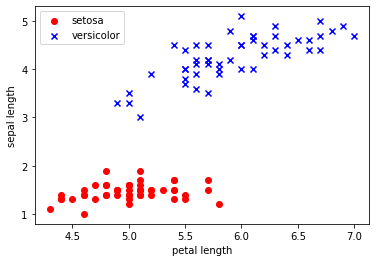

In [9]:
# graficar datos
plt.scatter(X[:50,0], X[:50,1], color='red', marker ='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker ='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc="upper left")
plt.show()

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [11]:
ppn.fit(X,y)

[0.21624345 1.39388244 0.93471828]
[0.01624345 0.79388244 1.31471828]
[-0.18375655  0.19388244  1.69471828]
[-0.18375655  0.31388244  2.11471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]


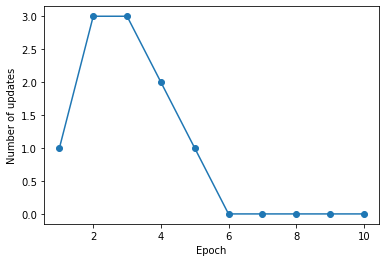

In [12]:
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

In [13]:
from matplotlib.colors import ListedColormap

In [14]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #Plot the decision surface
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl,1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor  = 'black')
    

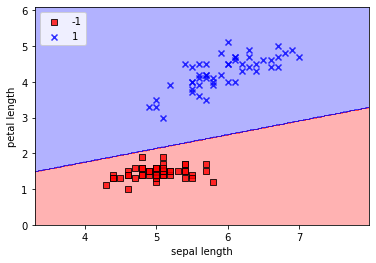

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()